In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data =pd.read_excel("diamonds_new.xlsx")
data

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53915,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53916,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53917,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53918,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [4]:
data.isnull().sum()


price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [5]:
data.describe()

,price,carat,depth,table,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,3933.492174,0.798018,61.749560,57.456769,5.731337,5.734703,3.538854
std,3989.963677,0.474061,1.432414,2.233927,1.121807,1.142192,0.705736
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,950.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5327.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,18823.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

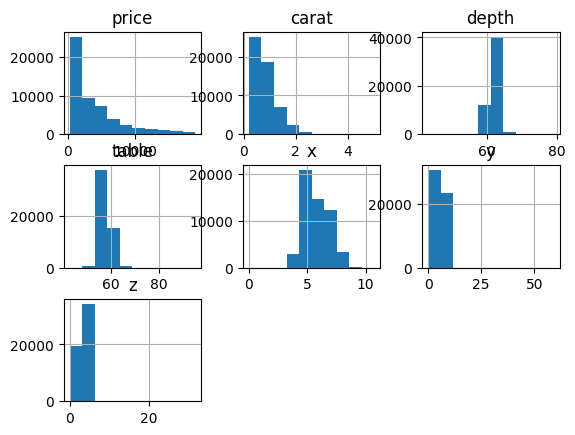

In [6]:
data.hist()

In [7]:
data.duplicated().sum()

np.int64(146)

In [8]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.shape

(53774, 10)

In [20]:
cont=data.select_dtypes(exclude=['object'])
cont

,price,carat,depth,table,x,y,z
0,326,0.23,61.5,55.0,3.95,3.98,2.43
1,326,0.21,59.8,61.0,3.89,3.84,2.31
2,327,0.23,56.9,65.0,4.05,4.07,2.31
3,334,0.29,62.4,58.0,4.20,4.23,2.63
4,335,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53915,2757,0.72,60.8,57.0,5.75,5.76,3.50
53916,2757,0.72,63.1,55.0,5.69,5.75,3.61
53917,2757,0.70,62.8,60.0,5.66,5.68,3.56
53918,2757,0.86,61.0,58.0,6.15,6.12,3.74


In [15]:
cat = data.select_dtypes(include=['object'])

In [35]:
cat.columns

Index(['cut', 'color', 'clarity'], dtype='object')

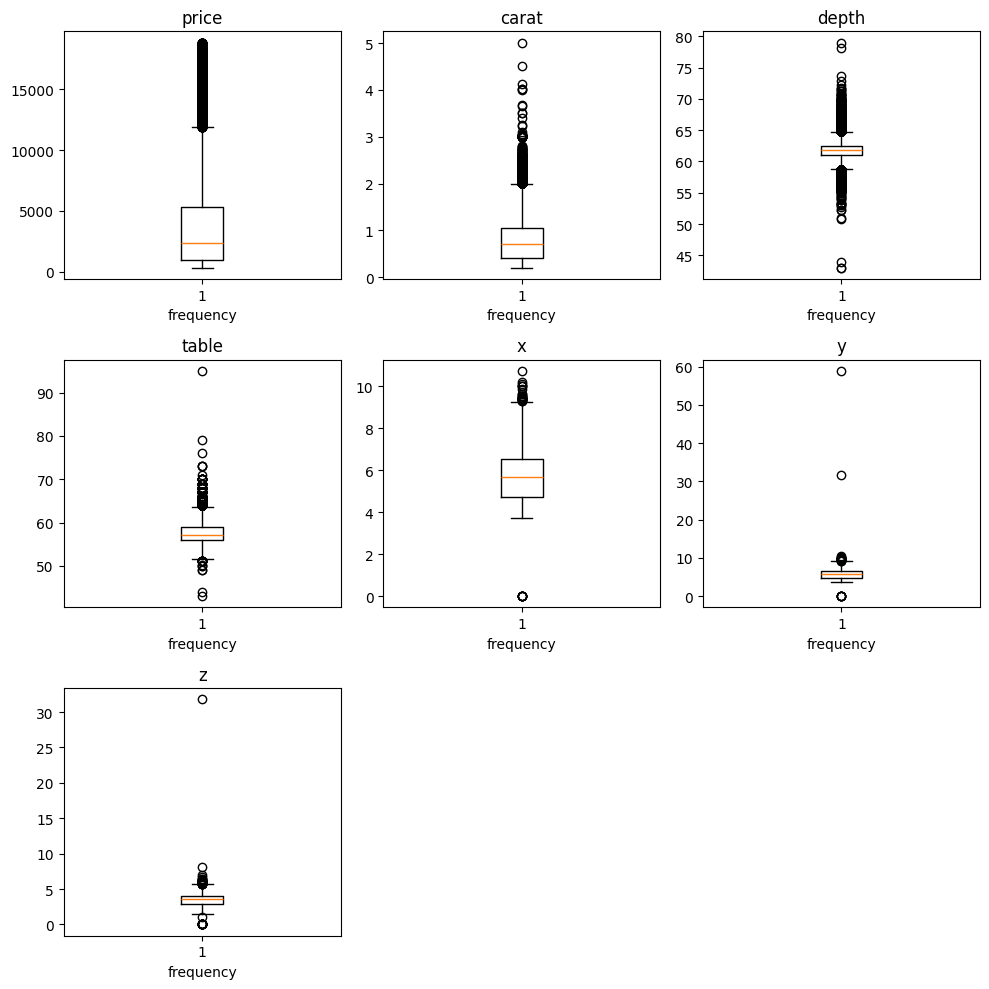

In [17]:
plt.figure(figsize=(10, 10))
for i,col in enumerate(cont.columns):
    plt.subplot(3, 3, i+1)
    plt.boxplot(data[col])
    plt.title(col)
    plt.xlabel('frequency')
plt.tight_layout()
plt.show()
    

In [27]:
def remove_outliers(col):
    for column in columns:
        Q1 =data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound =Q1 -1.5 * IQR  
        upper_bound = Q3 + 1.5 * IQR
        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
columns = cont.columns
        

In [28]:
remove_outliers(['price','carat','depth','x','y','z'])

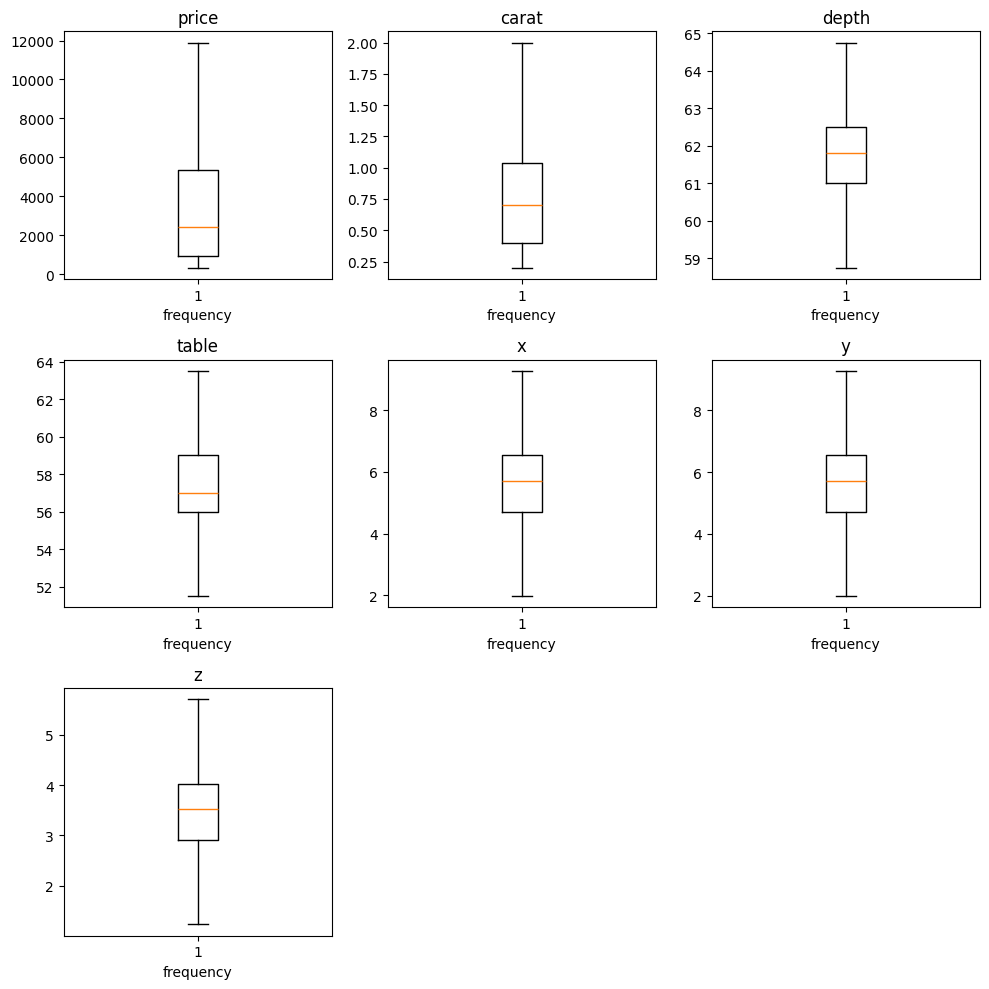

In [29]:
plt.figure(figsize=(10, 10))
for i,col in enumerate(cont.columns):
    plt.subplot(3, 3, i+1)
    plt.boxplot(data[col])
    plt.title(col)
    plt.xlabel('frequency')
plt.tight_layout()
plt.show()
    

In [33]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'D', 'F', 'G'], dtype=object)

In [36]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [38]:
data["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS1', 'I1', 'VVS2', 'IF'],
      dtype=object)

In [39]:
data['color'].replace(['E', 'I', 'J', 'H', 'D', 'F', 'G'],[0,1,2,3,4,5,6], inplace=True)

In [43]:
data['cut'].replace(['Fair', 'Good', 'Very Good', 'Ideal', 'Premium'],[0,1,2,3,4], inplace=True)

In [44]:
data['clarity'].replace(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],[0,1,2,3,4,5,6,7], inplace=True)

In [45]:
cont

,price,carat,depth,table,x,y,z
0,326,0.23,61.5,55.0,3.95,3.98,2.43
1,326,0.21,59.8,61.0,3.89,3.84,2.31
2,327,0.23,56.9,65.0,4.05,4.07,2.31
3,334,0.29,62.4,58.0,4.20,4.23,2.63
4,335,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53915,2757,0.72,60.8,57.0,5.75,5.76,3.50
53916,2757,0.72,63.1,55.0,5.69,5.75,3.61
53917,2757,0.70,62.8,60.0,5.66,5.68,3.56
53918,2757,0.86,61.0,58.0,6.15,6.12,3.74


In [47]:
data.corr()

,price,carat,cut,color,clarity,depth,table,x,y,z
price,1.000000,0.936538,0.025890,0.007945,-0.153953,-0.009114,0.136286,0.911933,0.913454,0.905001
carat,0.936538,1.000000,-0.018623,-0.040096,-0.352763,0.021537,0.186911,0.981969,0.981240,0.977594
cut,0.025890,-0.018623,1.000000,0.018794,0.062324,-0.329114,-0.046952,-0.004304,-0.013906,-0.047555
color,0.007945,-0.040096,0.018794,1.000000,0.088899,-0.001277,-0.038832,-0.032144,-0.032237,-0.032180
clarity,-0.153953,-0.352763,0.062324,0.088899,1.000000,-0.063739,-0.162818,-0.371929,-0.366687,-0.373904
depth,-0.009114,0.021537,-0.329114,-0.001277,-0.063739,1.000000,-0.299834,-0.029069,-0.031777,0.089770
table,0.136286,0.186911,-0.046952,-0.038832,-0.162818,-0.299834,1.000000,0.197858,0.191894,0.157597
x,0.911933,0.981969,-0.004304,-0.032144,-0.371929,-0.029069,0.197858,1.000000,0.998357,0.988260
y,0.913454,0.981240,-0.013906,-0.032237,-0.366687,-0.031777,0.191894,0.998357,1.000000,0.987883
z,0.905001,0.977594,-0.047555,-0.032180,-0.373904,0.089770,0.157597,0.988260,0.987883,1.000000


In [49]:
X =data[['carat','depth','x','y','z']]
y=data['price']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [54]:
y_pred =model.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)

In [56]:
print(f"r2_score:{r2:.2f}")
print(f"mean_squared_error:{mse:.2f}")
print(f"root_mean_squared_error:{rmse:.2f}")

r2_score:0.88
mean_squared_error:1375215.10
root_mean_squared_error:1172.70


In [57]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred =model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
print(f"r2_score:{r2:.2f}")
print(f"mean_squared_error:{mse:.2f}")
print(f"root_mean_squared_error:{rmse:.2f}")

r2_score:0.81
mean_squared_error:2220045.44
root_mean_squared_error:1489.98


In [58]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred =model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
print(f"r2_score:{r2:.2f}")
print(f"mean_squared_error:{mse:.2f}")
print(f"root_mean_squared_error:{rmse:.2f}")

r2_score:0.89
mean_squared_error:1258398.39
root_mean_squared_error:1121.78
